### 과제

[coco dataset](https://cocodataset.org/#download)

coco데이터셋을 사용하여 강아지/고양이를 찾는 프로그램을 작성하기 
 

파일 다운받고 폴더에 나눠주기 

In [1]:
import os
import random
import shutil
import json
import pandas as pd
from PIL import Image

In [2]:
!pip install pycocotools
import os
import requests
import zipfile

# COCO dataset URL
urls = [
    ("http://images.cocodataset.org/zips/val2017.zip", "val2017.zip"),
    ("http://images.cocodataset.org/annotations/annotations_trainval2017.zip", "annotations_trainval2017.zip")
]

# 다운받은 파일 저장 경로 
download_dir = "coco_data"

# 경로 없는경우 경로 생성해주기 
if not os.path.exists(download_dir):
    os.makedirs(download_dir)
# Download and extract the files
for url, filename in urls:
    file_path = os.path.join(download_dir, filename)
    if not os.path.exists(file_path):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(file_path, "wb") as f:
            f.write(response.content)
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(file_path, "r") as zip_ref:
            zip_ref.extractall(download_dir)
        print(f"{filename} downloaded and extracted.")
    else:
        print(f"{filename} already exists. Skipping download.")

Extracting val2017.zip...
val2017.zip downloaded and extracted.
Extracting annotations_trainval2017.zip...
annotations_trainval2017.zip downloaded and extracted.


In [2]:
!pip install ultralytics

In [3]:
# import json
annot_dir = './coco_data/instances_val2017.json'
# JSON 파일 읽기
with open(annot_dir, 'r') as f:
    data = json.load(f)
    
categories = data['categories']

# 첫 번째 딕셔너리 내의 키(key)들을 컬럼명으로 추출
column_names = list(categories[0].keys())
print(column_names)

['supercategory', 'id', 'name']


In [4]:
# 각 클래스의 이름 출력
for category in categories:
    print("Class ID:", category['id'])
    print("Class Name:", category['name'])
    print()

Class ID: 1
Class Name: person

Class ID: 2
Class Name: bicycle

Class ID: 3
Class Name: car

Class ID: 4
Class Name: motorcycle

Class ID: 5
Class Name: airplane

Class ID: 6
Class Name: bus

Class ID: 7
Class Name: train

Class ID: 8
Class Name: truck

Class ID: 9
Class Name: boat

Class ID: 10
Class Name: traffic light

Class ID: 11
Class Name: fire hydrant

Class ID: 13
Class Name: stop sign

Class ID: 14
Class Name: parking meter

Class ID: 15
Class Name: bench

Class ID: 16
Class Name: bird

Class ID: 17
Class Name: cat

Class ID: 18
Class Name: dog

Class ID: 19
Class Name: horse

Class ID: 20
Class Name: sheep

Class ID: 21
Class Name: cow

Class ID: 22
Class Name: elephant

Class ID: 23
Class Name: bear

Class ID: 24
Class Name: zebra

Class ID: 25
Class Name: giraffe

Class ID: 27
Class Name: backpack

Class ID: 28
Class Name: umbrella

Class ID: 31
Class Name: handbag

Class ID: 32
Class Name: tie

Class ID: 33
Class Name: suitcase

Class ID: 34
Class Name: frisbee

Class ID

In [5]:
print(data.keys())
print(data['annotations'][0])

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
{'segmentation': [[510.66, 423.01, 511.72, 420.03, 510.45, 416.0, 510.34, 413.02, 510.77, 410.26, 510.77, 407.5, 510.34, 405.16, 511.51, 402.83, 511.41, 400.49, 510.24, 398.16, 509.39, 397.31, 504.61, 399.22, 502.17, 399.64, 500.89, 401.66, 500.47, 402.08, 499.09, 401.87, 495.79, 401.98, 490.59, 401.77, 488.79, 401.77, 485.39, 398.58, 483.9, 397.31, 481.56, 396.35, 478.48, 395.93, 476.68, 396.03, 475.4, 396.77, 473.92, 398.79, 473.28, 399.96, 473.49, 401.87, 474.56, 403.47, 473.07, 405.59, 473.39, 407.71, 476.68, 409.41, 479.23, 409.73, 481.56, 410.69, 480.4, 411.85, 481.35, 414.93, 479.86, 418.65, 477.32, 420.03, 476.04, 422.58, 479.02, 422.58, 480.29, 423.01, 483.79, 419.93, 486.66, 416.21, 490.06, 415.57, 492.18, 416.85, 491.65, 420.24, 492.82, 422.9, 493.56, 424.39, 496.43, 424.6, 498.02, 423.01, 498.13, 421.31, 497.07, 420.03, 497.07, 415.15, 496.33, 414.51, 501.1, 411.96, 502.06, 411.32, 503.02, 415.04, 503.33

In [6]:
# 'annotations' 키에 해당하는 데이터를 데이터프레임으로 변환
df = pd.DataFrame(data['annotations'])

In [7]:
df

segmentation          area  \
0      [[510.66, 423.01, 511.72, 420.03, 510.45, 416....     702.10575   
1      [[289.74, 443.39, 302.29, 445.32, 308.09, 427....   27718.47630   
2      [[147.76, 396.11, 158.48, 355.91, 153.12, 347....   78969.31690   
3      [[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...  108316.66515   
4      [[200.61, 253.97, 273.19, 318.49, 302.43, 336....   75864.53530   
...                                                  ...           ...   
36776  {'counts': [94823, 6, 473, 8, 471, 10, 469, 11...    3773.00000   
36777  {'counts': [277, 2, 361, 9, 1, 17, 3, 17, 3, 8...  112181.00000   
36778  {'counts': [2770, 6, 418, 8, 416, 10, 86, 6, 3...   47024.00000   
36779  {'counts': [3912, 10, 363, 18, 356, 23, 301, 1...   27277.00000   
36780  {'counts': [179, 27, 392, 41, 380, 51, 371, 59...  220834.00000   

       iscrowd  image_id                              bbox  category_id  \
0            0    289343    [473.07, 395.93, 38.65, 28.67]           18   
1            0     61471   [272.1, 200.23, 151.97, 279.77]           18   
2            0    472375  [124.71, 196.18, 372.85, 356.81]           18   
3            0    520301  [112.71, 154.82, 367.29, 479.35]           18   
4            0    579321   [200.61, 89.65, 400.22, 251.02]           18   
...        ...       ...                               ...          ...   
36776        1     15517               [197, 248, 264, 45]            6   
36777        1    439994                  [0, 0, 427, 458]            1   
36778        1    117719                 [6, 75, 474, 263]           44   
36779        1     50149                [10, 41, 403, 152]           52   
36780        1    250282                 [0, 34, 639, 388]            1   

                 id  
0              1768  
1              1773  
2              2551  
3              3186  
4              3419  
...             ...  
36776  900600015517  
36777  900100439994  
36778  904400117719  
36779  905200050149  
36780  900100250282  

[36781 rows x 7 columns]

In [8]:
# 'category_id'가 17 또는 18인 행만 추출
df2 = df[(df['category_id'] == 17) | (df['category_id'] == 18)]
df2

segmentation          area  \
0      [[510.66, 423.01, 511.72, 420.03, 510.45, 416....     702.10575   
1      [[289.74, 443.39, 302.29, 445.32, 308.09, 427....   27718.47630   
2      [[147.76, 396.11, 158.48, 355.91, 153.12, 347....   78969.31690   
3      [[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...  108316.66515   
4      [[200.61, 253.97, 273.19, 318.49, 302.43, 336....   75864.53530   
...                                                  ...           ...   
32947  [[291.17, 213.74, 291.29, 212.97, 291.68, 212....      28.32735   
32985  [[479.66, 264.26, 456.95, 315.18, 424.6, 316.5...   13807.10555   
32986  [[354.85, 298.42, 356.67, 283.83, 341.16, 266....    6369.58255   
32987  [[45.42, 430.8, 45.42, 421.16, 59.18, 408.77, ...   27071.05015   
35504  [[251.59, 343.11, 191.07, 352.97, 178.4, 306.5...   13162.69195   

       iscrowd  image_id                              bbox  category_id  \
0            0    289343    [473.07, 395.93, 38.65, 28.67]           18   
1            0     61471   [272.1, 200.23, 151.97, 279.77]           18   
2            0    472375  [124.71, 196.18, 372.85, 356.81]           18   
3            0    520301  [112.71, 154.82, 367.29, 479.35]           18   
4            0    579321   [200.61, 89.65, 400.22, 251.02]           18   
...        ...       ...                               ...          ...   
32947        0     57760       [291.17, 211.0, 9.28, 4.96]           18   
32985        0    117908  [346.84, 146.58, 153.16, 169.98]           17   
32986        0     14007   [340.25, 153.38, 76.63, 145.04]           17   
32987        0    290843    [22.02, 246.37, 220.22, 256.0]           17   
35504        0    243344   [178.4, 161.54, 101.35, 191.43]           17   

            id  
0         1768  
1         1773  
2         2551  
3         3186  
4         3419  
...        ...  
32947  2210175  
32985    47200  
32986    48706  
32987    52285  
35504  1816125  

[420 rows x 7 columns]

In [9]:
rawimages_path = './coco_data/rawimages'

# 'image_id'가 12자리로 구성되도록 포맷팅
df2['formatted_image_id'] = df2['image_id'].apply(lambda x: f'{x:012}')


C:\Users\kanae\AppData\Local\Temp\ipykernel_31704\2650726509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['formatted_image_id'] = df2['image_id'].apply(lambda x: f'{x:012}')


In [10]:
df2

segmentation          area  \
0      [[510.66, 423.01, 511.72, 420.03, 510.45, 416....     702.10575   
1      [[289.74, 443.39, 302.29, 445.32, 308.09, 427....   27718.47630   
2      [[147.76, 396.11, 158.48, 355.91, 153.12, 347....   78969.31690   
3      [[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...  108316.66515   
4      [[200.61, 253.97, 273.19, 318.49, 302.43, 336....   75864.53530   
...                                                  ...           ...   
32947  [[291.17, 213.74, 291.29, 212.97, 291.68, 212....      28.32735   
32985  [[479.66, 264.26, 456.95, 315.18, 424.6, 316.5...   13807.10555   
32986  [[354.85, 298.42, 356.67, 283.83, 341.16, 266....    6369.58255   
32987  [[45.42, 430.8, 45.42, 421.16, 59.18, 408.77, ...   27071.05015   
35504  [[251.59, 343.11, 191.07, 352.97, 178.4, 306.5...   13162.69195   

       iscrowd  image_id                              bbox  category_id  \
0            0    289343    [473.07, 395.93, 38.65, 28.67]           18   
1            0     61471   [272.1, 200.23, 151.97, 279.77]           18   
2            0    472375  [124.71, 196.18, 372.85, 356.81]           18   
3            0    520301  [112.71, 154.82, 367.29, 479.35]           18   
4            0    579321   [200.61, 89.65, 400.22, 251.02]           18   
...        ...       ...                               ...          ...   
32947        0     57760       [291.17, 211.0, 9.28, 4.96]           18   
32985        0    117908  [346.84, 146.58, 153.16, 169.98]           17   
32986        0     14007   [340.25, 153.38, 76.63, 145.04]           17   
32987        0    290843    [22.02, 246.37, 220.22, 256.0]           17   
35504        0    243344   [178.4, 161.54, 101.35, 191.43]           17   

            id formatted_image_id  
0         1768       000000289343  
1         1773       000000061471  
2         2551       000000472375  
3         3186       000000520301  
4         3419       000000579321  
...        ...                ...  
32947  2210175       000000057760  
32985    47200       000000117908  
32986    48706       000000014007  
32987    52285       000000290843  
35504  1816125       000000243344  

[420 rows x 8 columns]

In [11]:
# df2['category_id']가 17인 경우 0으로 변경
df2.loc[df2['category_id'] == 17, 'category_id'] = 0

# df2['category_id']가 18인 경우 1로 변경
df2.loc[df2['category_id'] == 18, 'category_id'] = 1

In [12]:
df2.head(3)

segmentation         area  iscrowd  \
0  [[510.66, 423.01, 511.72, 420.03, 510.45, 416....    702.10575        0   
1  [[289.74, 443.39, 302.29, 445.32, 308.09, 427....  27718.47630        0   
2  [[147.76, 396.11, 158.48, 355.91, 153.12, 347....  78969.31690        0   

   image_id                              bbox  category_id    id  \
0    289343    [473.07, 395.93, 38.65, 28.67]            1  1768   
1     61471   [272.1, 200.23, 151.97, 279.77]            1  1773   
2    472375  [124.71, 196.18, 372.85, 356.81]            1  2551   

  formatted_image_id  
0       000000289343  
1       000000061471  
2       000000472375

In [15]:
# 이름이 같은 경우
from collections import Counter

# 'category_id'의 각 값의 개수를 카운트
category_id_counts = Counter(df2['formatted_image_id'])

# 'category_id'가 같은 행이 2개 이상인 값들의 인덱스 출력
duplicate_indexes = [index for index, count in category_id_counts.items() if count >= 2]
print(duplicate_indexes)

['000000402473', '000000554291', '000000129756', '000000169076', '000000209613', '000000432553', '000000372819', '000000366884', '000000077396', '000000193162', '000000219578', '000000241326', '000000189806', '000000246454', '000000478393', '000000375493', '000000187236', '000000409867', '000000551815', '000000555705', '000000375278', '000000411665', '000000570664', '000000398810', '000000063552', '000000117374', '000000413395', '000000049810', '000000081766', '000000401991', '000000071226', '000000089880', '000000179392', '000000182805', '000000236784', '000000149568', '000000355240', '000000512836', '000000107226', '000000289702', '000000143961', '000000039769', '000000269113', '000000562561', '000000022892', '000000090003', '000000547502', '000000464522', '000000125405', '000000262938', '000000333772', '000000318238', '000000427034', '000000543581', '000000057760']


In [16]:
df3 = df2[['formatted_image_id', 'category_id', 'bbox']].copy()

In [20]:
df3_sorted = df3.sort_values(by='formatted_image_id', ascending=True)
print(df3_sorted)

      formatted_image_id  category_id                              bbox
12935       000000001675            0       [0.0, 14.01, 640.0, 293.56]
8505        000000004795            0  [152.77, 113.55, 395.36, 364.39]
102         000000007386            1     [180.91, 281.14, 38.4, 45.48]
81          000000010363            0   [245.51, 108.3, 226.13, 135.68]
32986       000000014007            0   [340.25, 153.38, 76.63, 145.04]
...                  ...          ...                               ...
12102       000000572388            0       [0.0, 1.47, 185.29, 451.47]
8546        000000574315            0   [181.78, 105.3, 251.74, 235.66]
8521        000000574810            0    [64.52, 93.55, 215.05, 366.67]
12879       000000575357            1   [250.5, 158.39, 366.49, 199.85]
4           000000579321            1   [200.61, 89.65, 400.22, 251.02]

[420 rows x 3 columns]


In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# df3 출력
print(df3_sorted)

# 설정 원상복귀
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

      formatted_image_id  category_id                              bbox
12935       000000001675            0       [0.0, 14.01, 640.0, 293.56]
8505        000000004795            0  [152.77, 113.55, 395.36, 364.39]
102         000000007386            1     [180.91, 281.14, 38.4, 45.48]
81          000000010363            0   [245.51, 108.3, 226.13, 135.68]
32986       000000014007            0   [340.25, 153.38, 76.63, 145.04]
9718        000000014831            0    [1.44, 232.99, 478.56, 405.57]
12948       000000015497            0    [32.36, 20.49, 451.95, 433.62]
12892       000000017029            1  [154.84, 105.81, 250.32, 436.13]
8553        000000018833            0    [186.67, 46.91, 320.7, 323.57]
12852       000000022192            1   [71.57, 120.67, 144.02, 255.26]
16592       000000022892            0   [237.75, 23.48, 261.45, 230.57]
16555       000000022892            1     [35.62, 76.0, 253.35, 219.76]
73          000000023272            0    [186.29, 73.39, 125.81,

In [23]:
# label_folder = './labels'  # 라벨 파일을 저장할 폴더 경로
# os.makedirs(label_folder, exist_ok=True)

# for index, row in df3.iterrows():
#     formatted_image_id = row['formatted_image_id']
#     category_id = row['category_id']
#     bbox = row['bbox']
    
#     x_center = bbox[0]
#     y_center = bbox[1]
#     width = bbox[2] 
#     height = bbox[3]
    
#     label_content = f"{category_id} {x_center:.8f} {y_center:.8f} {width:.8f} {height:.8f}\n"
    
#     label_filename = os.path.join(label_folder, f"{formatted_image_id}.txt")
#     with open(label_filename, 'a') as f:
#         f.write(label_content)

# print("라벨 파일 생성 완료!")

라벨 파일 생성 완료!


In [30]:
def get_image_size(image_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    return width, height

output_folder = './coco_data/labels'  # 라벨 파일을 저장할 폴더 경로
os.makedirs(output_folder, exist_ok=True)

for index, row in df3.iterrows():
    filename = row['formatted_image_id'] + '.txt'
    label_path = os.path.join(output_folder, filename)
    
    category_id = row['category_id']
    x, y, width, height = row['bbox']
    
    # 이미지의 너비와 높이 가져오기
    image_path = os.path.join('./coco_data/fulldataset/images', row['formatted_image_id'] + '.jpg')
    image_width, image_height = get_image_size(image_path)
    
    # YOLO 형식의 바운딩 박스 좌표 계산
    x_center = x + width / 2
    y_center = y + height / 2
    x_center /= image_width  # 이미지 너비로 정규화
    y_center /= image_height  # 이미지 높이로 정규화
    width /= image_width  # 너비로 정규화
    height /= image_height  # 높이로 정규화
    
    with open(label_path, 'a') as f:
        line = f"{category_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
        f.write(line)


In [24]:
# 대상 이미지 폴더 경로 설정
target_images_path = './coco_data/fulldataset/images'
# 결과 저장 폴더 생성
if not os.path.exists(target_images_path):
    os.makedirs(target_images_path)

# df3의 formatted_image_id를 리스트로 변환
formatted_image_ids = df3['formatted_image_id'].tolist()

# 폴더에 있는 파일들을 순회하며 복사
for image_id in formatted_image_ids:
    source_path = os.path.join(rawimages_path, f"{image_id}.jpg")
    target_path = os.path.join(target_images_path, f"{image_id}.jpg")
    shutil.copy(source_path, target_path)

0 14 640 307


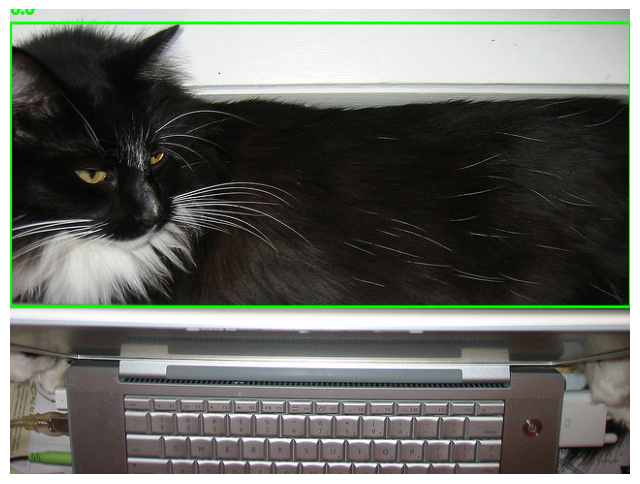

152 113 548 477


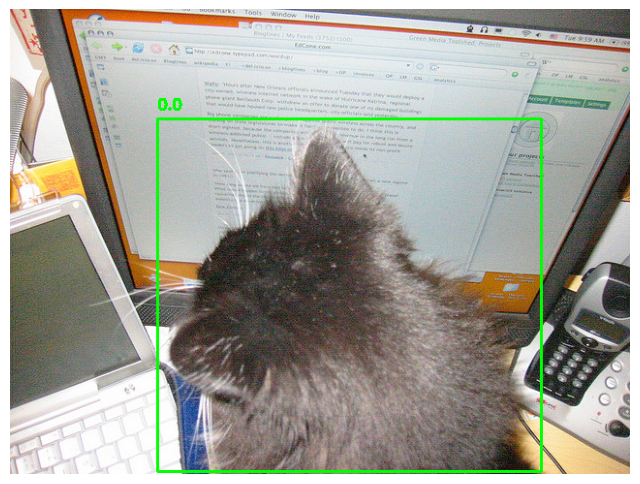

180 281 219 326


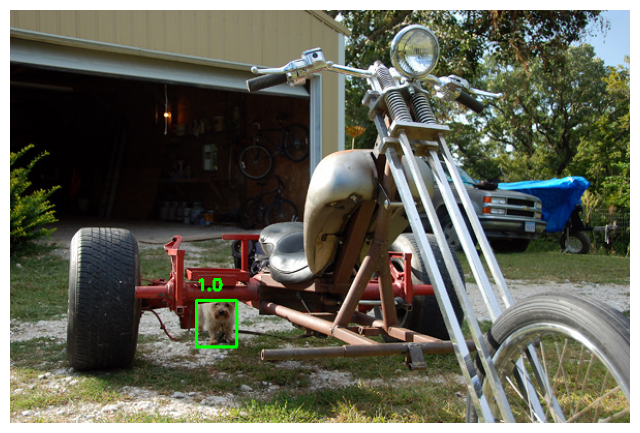

245 108 471 243


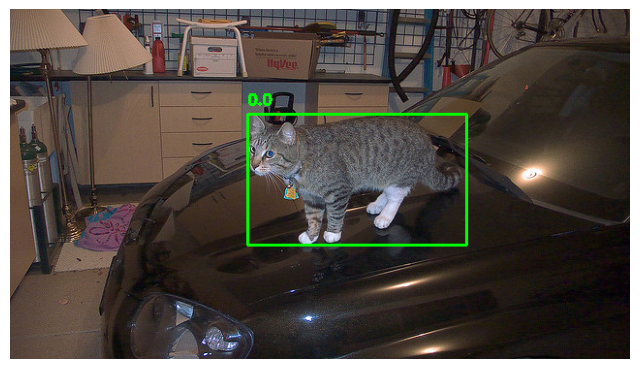

340 153 416 298


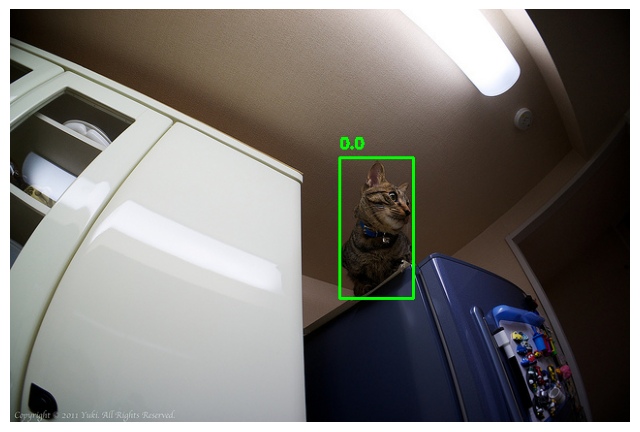

1 232 480 638


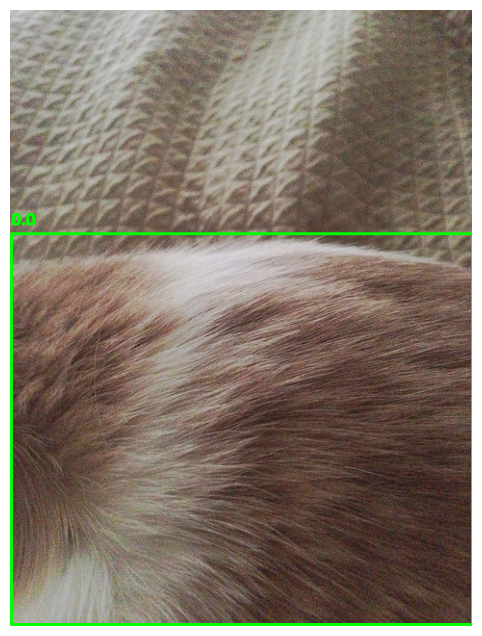

32 20 484 454


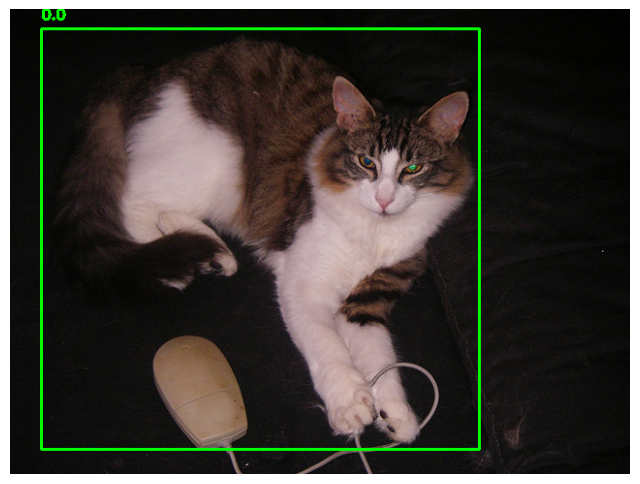

154 105 405 541


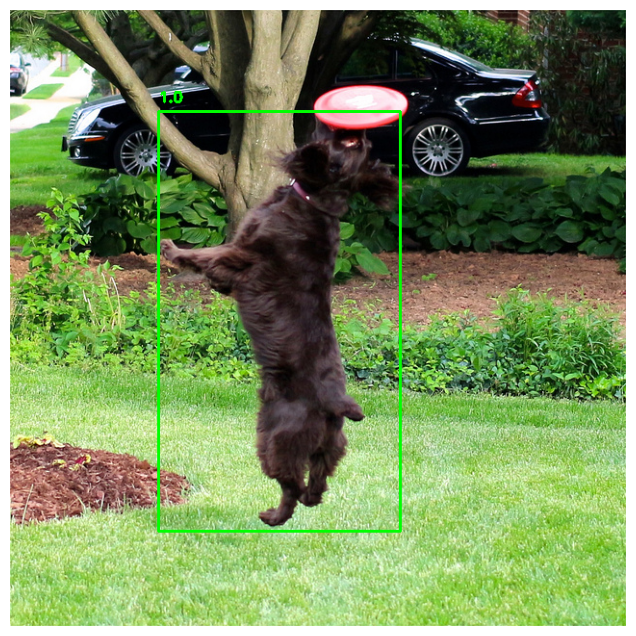

186 46 507 370


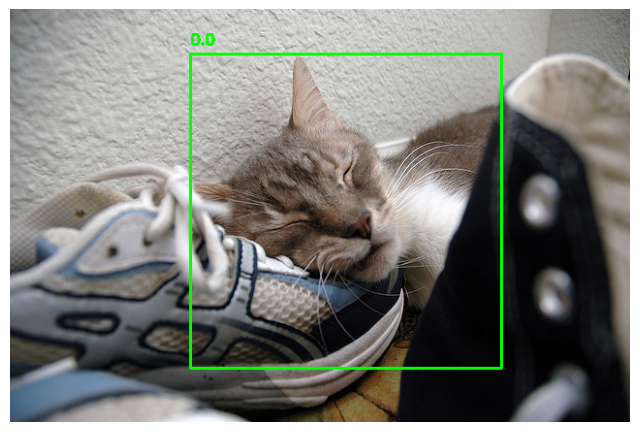

71 120 215 375


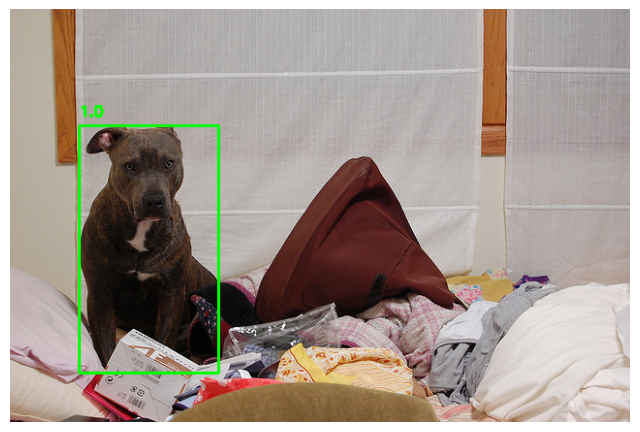

In [31]:
import cv2
import matplotlib.pyplot as plt

# 데이터셋 폴더 경로
new_dataset_path = 'C:\\SennysKDT\\ComputerVision\\CatDogPractice\\coco_data\\fulldataset'
new_images_path = os.path.join(new_dataset_path, 'images')
new_labels_path = os.path.join(new_dataset_path, 'labels')



# 시각화할 이미지 개수
num_images = 10

# 이미지와 라벨 파일을 순회하며 얼굴 감지 및 시각화
for i, image_file in enumerate(os.listdir(new_images_path)):
    if i >= num_images:
        break

    if image_file.endswith('.jpg'):
        image_path = os.path.join(new_images_path, image_file)
        label_file = os.path.join(new_labels_path, image_file.replace('.jpg', '.txt'))

        # 이미지 로드
        image = cv2.imread(image_path)
        if image is None:
            continue

        # 라벨 파일 열기
        with open(label_file, 'r') as f:
            label_lines = f.readlines()

        # 바운딩 박스 그리기
        for line in label_lines:
            class_index, x_center, y_center, width, height = map(float, line.strip().split())

            x_min = int((x_center - width / 2) * image.shape[1])
            y_min = int((y_center - height / 2) * image.shape[0])
            x_max = int((x_center + width / 2) * image.shape[1])
            y_max = int((y_center + height / 2) * image.shape[0])
            
            print(x_min, y_min, x_max, y_max)

            color = (0, 255, 0)  # 초록색
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
            cv2.putText(image, str(class_index), (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # 이미지 시각화
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

In [32]:
from sklearn.model_selection import train_test_split

# 경로 설정
source_images_folder = './coco_data/fulldataset/images'
source_labels_folder = './coco_data/fulldataset/labels'
train_images_folder = './coco_data/dataset/train/images'
train_labels_folder = './coco_data/dataset/train/labels'
validation_images_folder = './coco_data/dataset/validation/images'
validation_labels_folder = './coco_data/dataset/validation/labels'

# 폴더 생성
os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_labels_folder, exist_ok=True)
os.makedirs(validation_images_folder, exist_ok=True)
os.makedirs(validation_labels_folder, exist_ok=True)

# 파일 목록 가져오기
image_files = os.listdir(source_images_folder)
label_files = [file.replace('.jpg', '.txt') for file in image_files]

# 훈련 데이터와 검증 데이터로 나누기
train_image_files, validation_image_files = train_test_split(image_files, test_size=0.2, random_state=42)
train_label_files = [file.replace('.jpg', '.txt') for file in train_image_files]
validation_label_files = [file.replace('.jpg', '.txt') for file in validation_image_files]

# 이미지 파일 복사
for file in train_image_files:
    source_path = os.path.join(source_images_folder, file)
    target_path = os.path.join(train_images_folder, file)
    shutil.copy(source_path, target_path)

for file in validation_image_files:
    source_path = os.path.join(source_images_folder, file)
    target_path = os.path.join(validation_images_folder, file)
    shutil.copy(source_path, target_path)

# 라벨 파일 복사
for file in train_label_files:
    source_path = os.path.join(source_labels_folder, file)
    target_path = os.path.join(train_labels_folder, file)
    shutil.copy(source_path, target_path)

for file in validation_label_files:
    source_path = os.path.join(source_labels_folder, file)
    target_path = os.path.join(validation_labels_folder, file)
    shutil.copy(source_path, target_path)

print("데이터 나누기 완료!")


데이터 나누기 완료!


In [35]:
from ultralytics import YOLO

if __name__ == "__main__":
    model = YOLO('yolov8n.pt')
    model.train(data='C:\SennysKDT\ComputerVision\CatDogPractice\coco_data\dataset\cat_dog.yaml',epochs=10,batch=16, hsv_v=0, hsv_h=0, hsv_s=0, degrees=5,lrf=0.01)

New https://pypi.org/project/ultralytics/8.0.162 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.159  Python-3.8.6 torch-2.0.1+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\SennysKDT\ComputerVision\CatDogPractice\coco_data\dataset\cat_dog.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, vis

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0
                   all         70         83      0.358      0.395      0.329      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/10         0G      1.099       2.42      1.485          8        640: 100%|██████████| 18/18 [02:58<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0
                   all         70         83      0.355      0.341      0.315      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/10         0G      1.095      2.265      1.485          9        640: 100%|██████████| 18/18 [03:50<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0
                   all         70         83      0.424       0.

In [44]:
from ultralytics import YOLO
from PIL import Image, ImageDraw
from glob import glob
from tqdm import tqdm
import yaml
import numpy as np

np.random.seed(2023)

model = YOLO('C:/Users/kanae/runs/detect/train6/weights/best.pt')
classes = ['cat', 'dog']

filelist = glob('./coco_data/dataset/*jpg')
filelist = np.random.choice(filelist, size=3)
imgs = [Image.open(filename) for filename in filelist]

results = model(imgs)

def draw_bbox(draw, bbox, label, color=(0, 255, 0, 255), confs=None, size=15):
    draw.rectangle(bbox, outline=color, width =3)
    def set_alpha(color, value):
        background = list(color)
        background[3] = value
        return tuple(background)
    background = set_alpha(color, 50)
    draw.rectangle(bbox, outline=color, fill=background, width =3)
    background = set_alpha(color, 150)
    text = f"{label}" + ("" if confs==None else f":{conf:0.4}")
    text_bbox = bbox[0], bbox[1], bbox[0]+len(text)*10, bbox[1]+25
    draw.rectangle(text_bbox, outline=color, fill=background, width =3)
    draw.text((bbox[0]+5, bbox[1]+5), text, (0,0,0))
color = []
n_classes = len(classes)
for _ in range(n_classes):
    c = list(np.random.choice(range(256), size=3)) + [255]
    c = tuple(c)
    color.append(c)
for img, result in tqdm(zip(imgs, results)):
    img = img.resize((640, 640))
    width, height = img.size
    draw = ImageDraw.Draw(img, 'RGBA')
    result = result.cpu()
    xyxys = result.boxes.xyxyn
    confs = result.boxes.conf
    clss = result.boxes.cls
    
    xyxys = xyxys.numpy()
    
    clss = map(int, clss.numpy())
    for xyxy, conf, cls in zip(xyxys, confs, clss):
        xyxy = [xyxy[0] * width, xyxy[1] * height, xyxy[2] * width, xyxy[3] * height]
        draw_bbox(draw, bbox=xyxy, label=classes[cls], color=color[cls], confs=confs, size=15)
    img.show()
    


0: 640x640 (no detections), 1: 640x640 1 class_1, 379.3ms
Speed: 6.9ms preprocess, 189.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
2it [00:07,  3.84s/it]
